In [29]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
import networkx as nx
import warnings
import geopandas as gpd
from shapely.geometry import Point, LineString
from matplotlib.colors import ListedColormap
from shapely.geometry import MultiPoint
import matplotlib.image as mpimg

%run data_cleaning.ipynb

In [30]:
centroid_locations = pd.read_csv(r"data\CensusTractCentroids.csv")
metro_locations = pd.read_csv(r"data\MetroLinkStations_REGISTERED.csv")
north_south_locations = pd.read_csv(r"data\MetroLinkStations_NS.csv")
census_data = data = pd.read_csv(r"data\B08119_stl_city.csv")
race_data = pd.read_csv(r"data\B08105_stl_city.csv")
stl = nx.read_weighted_edgelist(r"data\weighted_dual_list",delimiter='%',nodetype=str)

In [31]:
k = 14 #number of clusters/metro stops for all algorithms

total_weight = 0
for edge in stl.edges(data=True):
    total_weight = total_weight + edge[2]['weight'] 
for edge in stl.edges(data=True):
    stl[edge[0]][edge[1]]['weight'] = total_weight - edge[2]['weight']


by_tract = clean(census_data, race_data)
centroid_locations_small = centroid_locations[['NAMELSAD','INTPTLAT','INTPTLON']]
centroid_locations_small = centroid_locations_small.rename(columns = {"NAMELSAD": "location", "INTPTLAT" : "LAT", "INTPTLON" : "LON"})
full_data = by_tract.merge(centroid_locations_small, on='location')
full_data.head()

,location,estimate,transit weight,income weight,race weight,node id,LAT,LON
0,Census Tract 1011,1039,0.003440,0.009653,0.007003,1011,38.554718,-90.273620
1,Census Tract 1012,1921,0.000660,0.009570,0.007421,1012,38.561824,-90.274863
2,Census Tract 1013,2161,0.001867,0.009560,0.007639,1013,38.566560,-90.264211
3,Census Tract 1014,1502,0.007292,0.009614,0.008835,1014,38.562243,-90.253522
4,Census Tract 1015,1318,0.002799,0.009645,0.007579,1015,38.548544,-90.264511


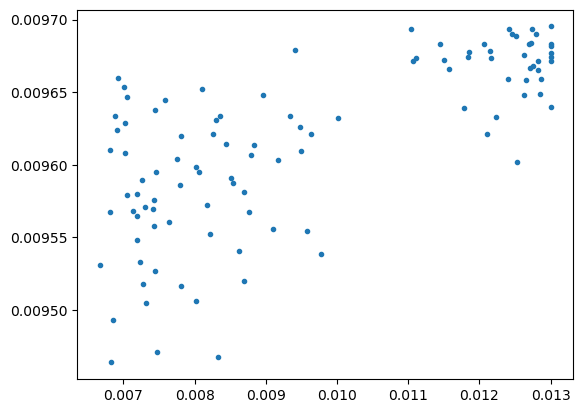

In [32]:
plt.plot(full_data['race weight'], full_data['income weight'], '.')

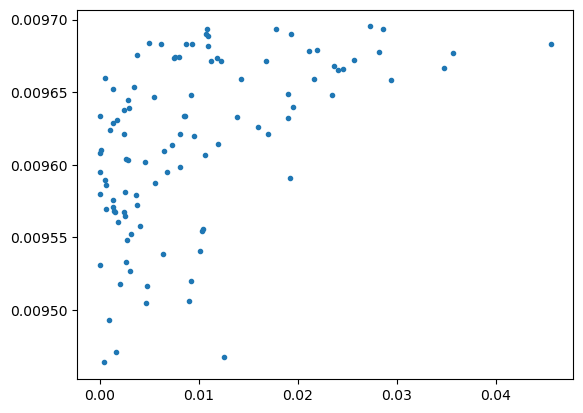

In [34]:
plt.plot(full_data['transit weight'], full_data['income weight'], '.')

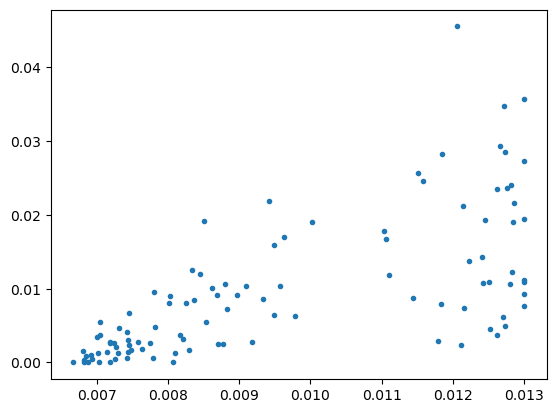

In [35]:
plt.plot(full_data['race weight'], full_data['transit weight'], '.')